In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
pd.options.mode.chained_assignment = None

In [13]:
import pandas as pd
file_path = 'TCS.BO.csv'
df = pd.read_csv(file_path)
print(df.head())

         Date         Open         High          Low        Close   Adj Close  \
0  2014-01-01  1090.000000  1092.500000  1075.525024  1076.849976  858.149536   
1  2014-01-02  1080.000000  1093.574951  1075.000000  1081.150024  861.576538   
2  2014-01-03  1087.500000  1114.125000  1075.500000  1111.000000  885.364075   
3  2014-01-06  1113.000000  1121.824951  1098.500000  1119.800049  892.376953   
4  2014-01-07  1119.150024  1127.400024  1100.300049  1104.099976  879.865173   

     Volume  
0   73300.0  
1  117324.0  
2  267204.0  
3  145172.0  
4  135104.0  


In [19]:
df_cleaned = df.dropna()
print(df_cleaned)

            Date         Open         High          Low        Close  \
0     2014-01-01  1090.000000  1092.500000  1075.525024  1076.849976   
1     2014-01-02  1080.000000  1093.574951  1075.000000  1081.150024   
2     2014-01-03  1087.500000  1114.125000  1075.500000  1111.000000   
3     2014-01-06  1113.000000  1121.824951  1098.500000  1119.800049   
4     2014-01-07  1119.150024  1127.400024  1100.300049  1104.099976   
...          ...          ...          ...          ...          ...   
2462  2023-12-22  3796.300049  3845.949951  3762.699951  3825.300049   
2463  2023-12-26  3780.100098  3833.850098  3780.100098  3794.600098   
2464  2023-12-27  3795.550049  3818.000000  3768.100098  3810.800049   
2465  2023-12-28  3822.100098  3838.250000  3793.750000  3801.050049   
2466  2023-12-29  3797.850098  3822.949951  3766.050049  3794.949951   

        Adj Close    Volume  
0      858.149536   73300.0  
1      861.576538  117324.0  
2      885.364075  267204.0  
3      892.3769

In [20]:
# Calculate 'H-L' and 'O-C' differences
df_cleaned['H-L'] = df_cleaned['High'] - df_cleaned['Low']
df_cleaned['O-C'] = df_cleaned['Close'] - df_cleaned['Open']

# Calculate moving averages
df_cleaned['3d MA'] = df_cleaned['Close'].rolling(window=3).mean()
df_cleaned['10d MA'] = df_cleaned['Close'].rolling(window=10).mean()
df_cleaned['30d MA'] = df_cleaned['Close'].rolling(window=30).mean()

# Calculate standard deviation
df_cleaned['Std_dev'] = df_cleaned['Close'].rolling(window=5).std()

# Create 'Price_Rise' column
df_cleaned['Price_Rise'] = (df_cleaned['Close'].shift(-1) > df_cleaned['Close']).astype(int)

# Drop last row as it will have NaN values for 'Price_Rise'
df_cleaned = df_cleaned.dropna()

# Display the cleaned DataFrame
print(df_cleaned)

            Date         Open         High          Low        Close  \
29    2014-02-11  1047.500000  1063.000000  1047.500000  1050.500000   
30    2014-02-12  1061.849976  1061.900024  1047.550049  1051.900024   
31    2014-02-13  1054.500000  1069.500000  1049.500000  1066.875000   
32    2014-02-14  1069.500000  1092.199951  1064.250000  1083.125000   
33    2014-02-17  1084.500000  1093.500000  1074.775024  1084.300049   
...          ...          ...          ...          ...          ...   
2462  2023-12-22  3796.300049  3845.949951  3762.699951  3825.300049   
2463  2023-12-26  3780.100098  3833.850098  3780.100098  3794.600098   
2464  2023-12-27  3795.550049  3818.000000  3768.100098  3810.800049   
2465  2023-12-28  3822.100098  3838.250000  3793.750000  3801.050049   
2466  2023-12-29  3797.850098  3822.949951  3766.050049  3794.949951   

        Adj Close    Volume        H-L        O-C        3d MA       10d MA  \
29     840.140564  202536.0  15.500000   3.000000  1056.

C:\Users\w2019695\AppData\Local\Temp\ipykernel_8908\623443299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['H-L'] = df_cleaned['High'] - df_cleaned['Low']
C:\Users\w2019695\AppData\Local\Temp\ipykernel_8908\623443299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['O-C'] = df_cleaned['Close'] - df_cleaned['Open']
C:\Users\w2019695\AppData\Local\Temp\ipykernel_8908\623443299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

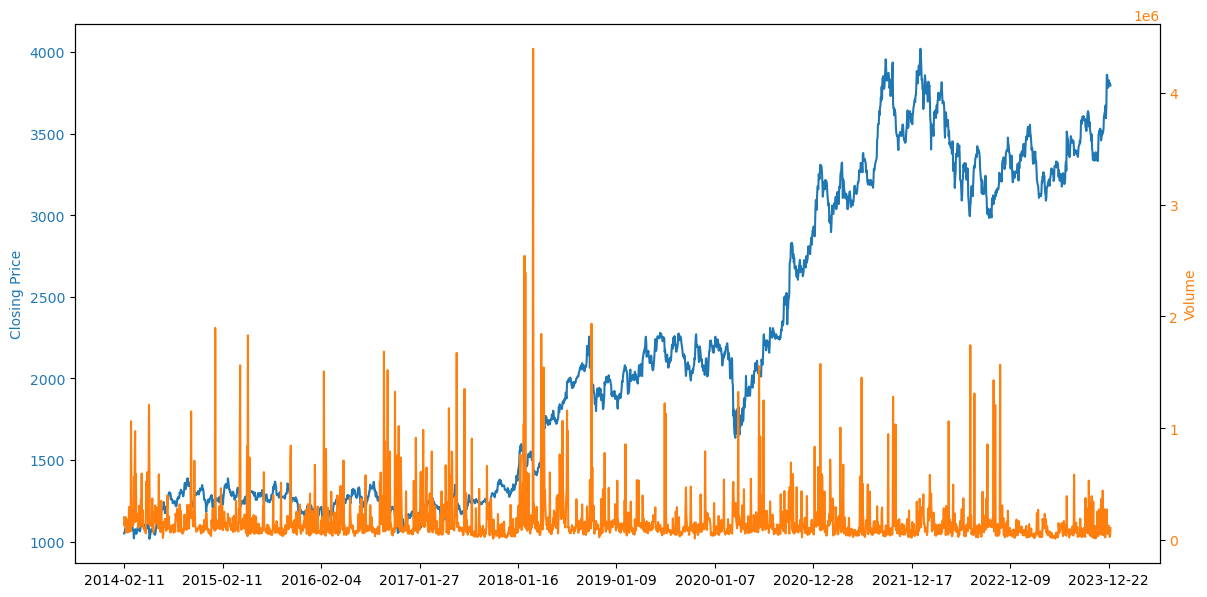

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a larger figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Closing Price on the first y-axis
color = 'tab:blue'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Volume on the second y-axis
color = 'tab:orange'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df_cleaned['Date'], df_cleaned['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Customize x-axis ticks to show only years
years = pd.to_datetime(df_cleaned['Date']).dt.year.unique()
plt.xticks(ticks=df_cleaned['Date'][::len(df_cleaned)//len(years)], labels=years, rotation=45)

# Add title and legend
plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()


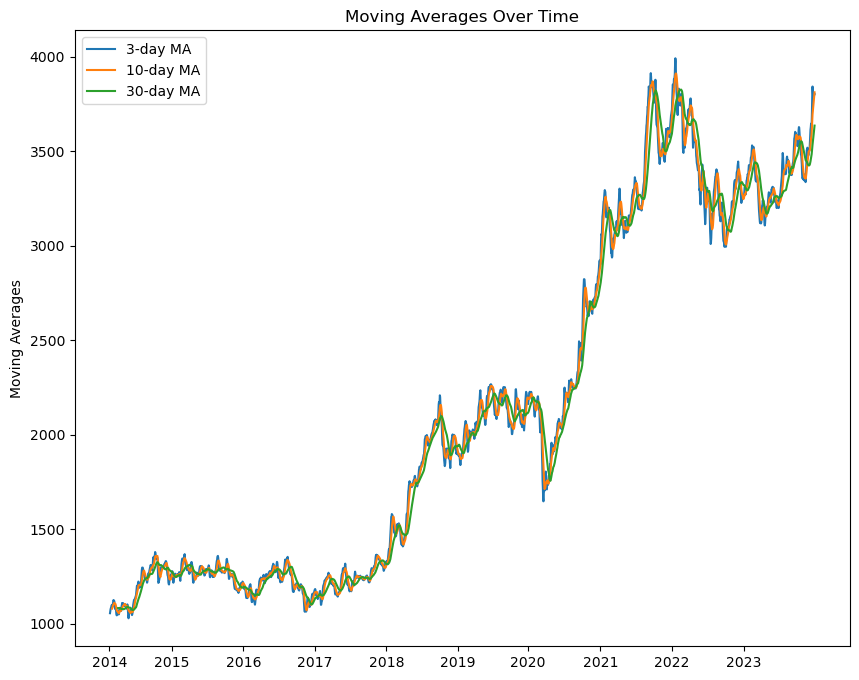

In [33]:
import matplotlib.pyplot as plt


# Extract years from the 'Date' column
years = pd.to_datetime(df_cleaned['Date']).dt.year.unique()

# Get the indices corresponding to the beginning of each year
year_indices = []
for year in years:
    year_indices.append(df_cleaned[df_cleaned['Date'].str.contains(str(year))].index[0])

plt.figure(figsize=(10, 8))

plt.plot(df_cleaned['3d_MA'], label='3-day MA')
plt.plot(df_cleaned['10d_MA'], label='10-day MA')
plt.plot(df_cleaned['30d_MA'], label='30-day MA')

# Set x-axis ticks to correspond to the indices where the years change
plt.xticks(ticks=year_indices, labels=years)

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()


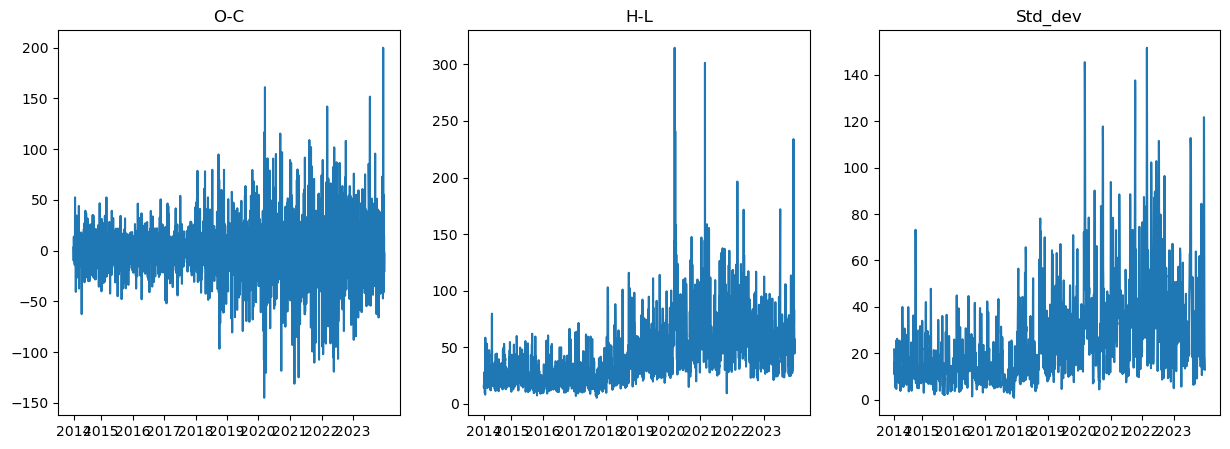

In [35]:
import matplotlib.pyplot as plt


# Extract years from the 'Date' column
years = pd.to_datetime(df_cleaned['Date']).dt.year.unique()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax in axes:
    ax.set_xticks(year_indices)
    ax.set_xticklabels(years)

axes[0].plot(df_cleaned['O-C'])
axes[0].set_title('O-C')

axes[1].plot(df_cleaned['H-L'])
axes[1].set_title('H-L')

axes[2].plot(df_cleaned['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()


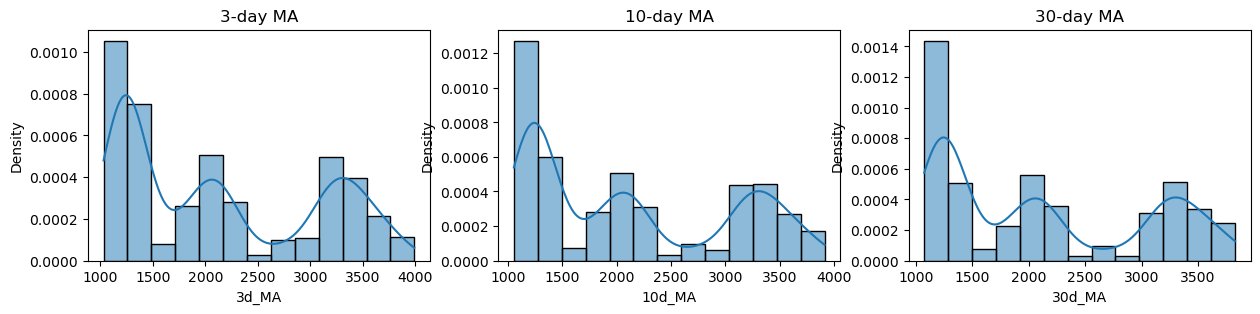

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=df_cleaned, x="3d_MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('3-day MA')

sns.histplot(data=df_cleaned, x="10d_MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('10-day MA')

sns.histplot(data=df_cleaned, x="30d_MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('30-day MA')

plt.show()


C:\UoW_Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


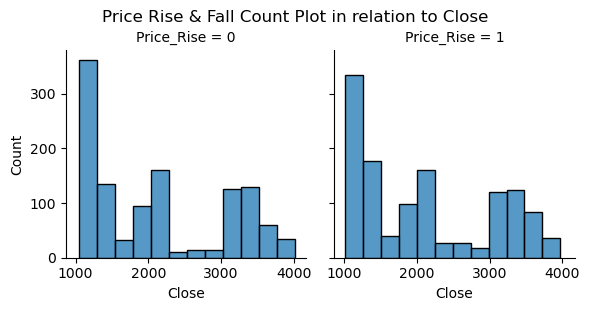

C:\UoW_Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


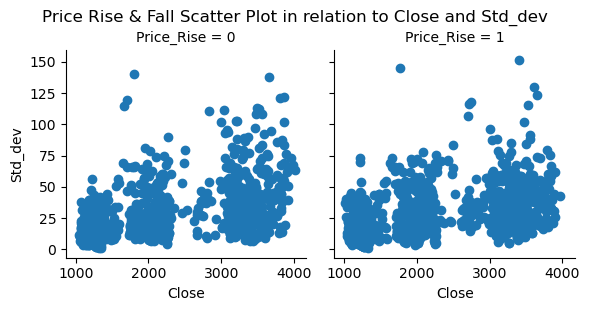

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price Rise & Fall Count Plot
chart_count = sns.FacetGrid(df_cleaned, col='Price_Rise')
chart_count.map(sns.histplot, 'Close')
plt.suptitle('Price Rise & Fall Count Plot in relation to Close', y=1.02)
plt.show()

# Price Rise & Fall Scatter Plot
chart_scatter = sns.FacetGrid(df_cleaned, col='Price_Rise')
chart_scatter.map(plt.scatter, 'Close', 'Std_dev')
plt.suptitle('Price Rise & Fall Scatter Plot in relation to Close and Std_dev', y=1.02)
plt.show()


In [39]:
# Display descriptive statistics
print(df_cleaned.describe())

# Display information about the dataset
print(df_cleaned.info())


              Open         High          Low        Close    Adj Close  \
count  2415.000000  2415.000000  2415.000000  2415.000000  2415.000000   
mean   2126.359090  2146.360566  2104.126642  2124.959420  2017.074690   
std     916.931070   923.834969   908.730037   916.450666   940.225882   
min    1017.000000  1039.000000  1000.250000  1017.349976   813.628784   
25%    1262.712524  1274.000000  1250.500000  1261.474976  1110.760132   
50%    1977.000000  1994.000000  1955.099976  1974.900024  1904.233765   
75%    3154.425049  3175.750000  3123.199951  3148.125000  3053.474976   
max    4045.500000  4045.500000  3981.000000  4019.100098  3880.605713   

             Volume          H-L          O-C        3d MA       10d MA  \
count  2.415000e+03  2415.000000  2415.000000  2415.000000  2415.000000   
mean   1.682678e+05    42.233925    -1.399670  2123.824075  2119.887967   
std    2.300806e+05    27.337938    30.149435   915.805719   913.719399   
min    1.028600e+04     5.425049 

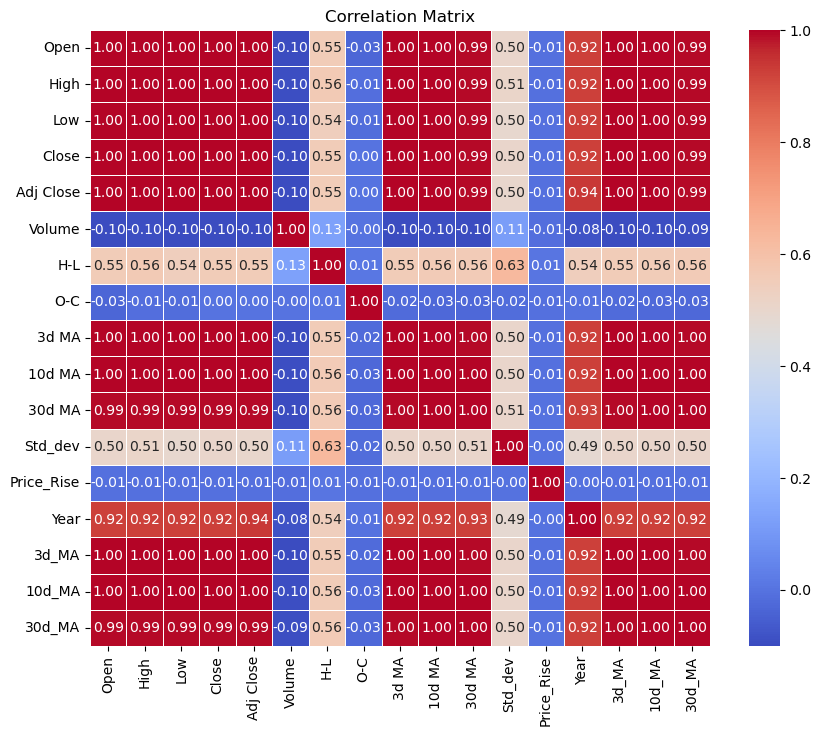

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix excluding non-numeric columns
corr_matrix = df_cleaned.corr(method='pearson', min_periods=1, numeric_only=True)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [42]:
# Set target variable Y (Price_Rise: 0 or 1) and features X (from H-L column to Std_dev column)
X = df_cleaned.loc[:, 'H-L':'Std_dev']
Y = df_cleaned['Price_Rise']

# Display features
print(X)


            H-L        O-C        3d MA       10d MA       30d MA    Std_dev
29    15.500000   3.000000  1056.341675  1085.967493  1115.374162  21.631318
30    14.349975  -9.949952  1049.750000  1080.679993  1114.542497  17.325573
31    20.000000  12.375000  1056.425008  1076.472498  1114.066663  10.983936
32    27.949951  13.625000  1067.300008  1072.975000  1113.137496  15.088916
33    18.724976  -0.199951  1078.100016  1071.572510  1111.954163  16.271172
...         ...        ...          ...          ...          ...        ...
2462  83.250000  29.000000  3798.366699  3749.985034  3577.036678  30.812797
2463  53.750000  14.500000  3803.116699  3765.225049  3591.915015  18.113791
2464  49.899902  15.250000  3810.233399  3779.100049  3607.848348  17.911341
2465  44.500000 -21.050049  3802.150065  3799.830054  3623.493351  14.216267
2466  56.899902  -2.900147  3802.266683  3812.665039  3636.681681  12.941387

[2415 rows x 6 columns]


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Display the testing set features
print(X_test)


            H-L        O-C        3d MA       10d MA       30d MA    Std_dev
1967  40.949951  22.300049  3633.750000  3606.595044  3556.254997  40.325331
1968  58.599853  -5.750000  3654.350016  3609.965039  3562.326660  45.779676
1969  46.850098  25.550049  3676.200033  3618.510034  3568.028328  34.340124
1970  30.449951  -7.699951  3691.033366  3626.960034  3573.141667  30.188729
1971  35.050049  -6.850098  3698.666667  3639.315015  3577.741667  18.588547
...         ...        ...          ...          ...          ...        ...
2462  83.250000  29.000000  3798.366699  3749.985034  3577.036678  30.812797
2463  53.750000  14.500000  3803.116699  3765.225049  3591.915015  18.113791
2464  49.899902  15.250000  3810.233399  3779.100049  3607.848348  17.911341
2465  44.500000 -21.050049  3802.150065  3799.830054  3623.493351  14.216267
2466  56.899902  -2.900147  3802.266683  3812.665039  3636.681681  12.941387

[483 rows x 6 columns]


In [44]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the standardized features
print(X_train)
print(X_test)


[[-0.86687493  0.1675296  -1.02955627 -0.98807262 -0.9452529  -0.09018393]
 [-0.91060213 -0.30693032 -1.03861873 -0.99538258 -0.9464216  -0.33362221]
 [-0.6957722   0.51101054 -1.0294417  -1.00119943 -0.94709027 -0.69216585]
 ...
 [ 2.16163952 -0.41867788  2.43347695  2.48473644  2.46562027  0.08689868]
 [ 1.26430639  0.91677424  2.44589621  2.48801987  2.47057849 -0.22092078]
 [-0.29272651  0.71709911  2.46551052  2.48850375  2.47645715  0.25204501]]
[[ 0.10080416  0.87464417  2.51395046  2.49668812  2.4848161   0.96673853]
 [ 0.77190333 -0.15305261  2.54227204  2.50134713  2.49334836  1.27511638]
 [ 0.32514443  0.99371756  2.57231217  2.51316057  2.50136067  0.62834678]
 ...
 [ 0.4411066   0.6163447   2.75658571  2.73517582  2.5573181  -0.30050405]
 [ 0.23578706 -0.71361531  2.74547247  2.763835    2.57930338 -0.50941625]
 [ 0.70726639 -0.04863979  2.7456328   2.78157933  2.59783639 -0.58149543]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a Logistic Regression model
model_lr = LogisticRegression(random_state=101)

# Train the model
model_lr.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model_lr.predict(X_test)

# Print the classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.46      0.10      0.17       244
           1       0.49      0.88      0.63       239

    accuracy                           0.49       483
   macro avg       0.48      0.49      0.40       483
weighted avg       0.48      0.49      0.40       483



In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Perform cross-validation
accuracy_scores = cross_val_score(model_lr, X, Y, cv=5, scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")


Mean Accuracy: 0.49
Standard Deviation: 0.02


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Create an Extra Trees Classifier model
model_et = ExtraTreesClassifier()

# Perform cross-validation
accuracy_scores = cross_val_score(model_et, X, Y, cv=5, scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")


Mean Accuracy: 0.50
Standard Deviation Accuracy: 0.02


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Create an Extra Trees Classifier model
model_et = ExtraTreesClassifier(random_state=101)

# Train the model
model_et.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model_et.predict(X_test)

# Print classification report
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.38      0.42       244
           1       0.48      0.59      0.53       239

    accuracy                           0.48       483
   macro avg       0.48      0.49      0.48       483
weighted avg       0.48      0.48      0.48       483



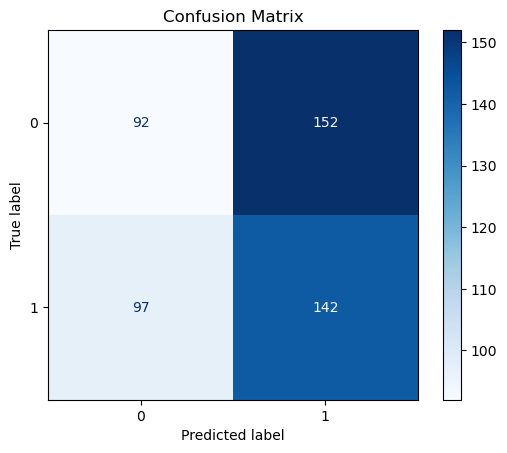

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_et.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


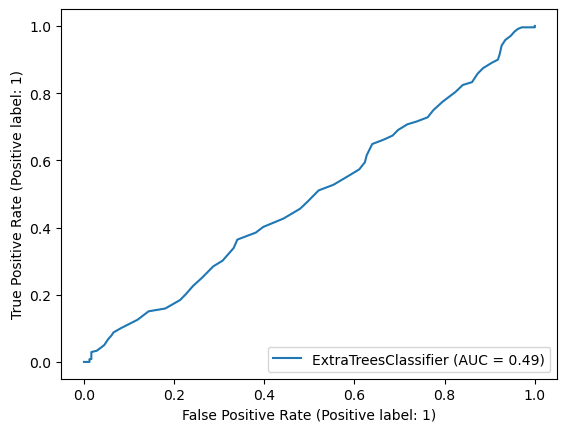

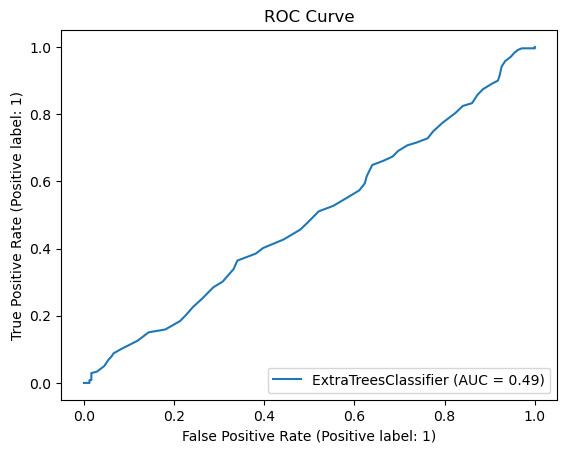

In [50]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
roc_disp = RocCurveDisplay.from_estimator(model_et, X_test, Y_test)
roc_disp.plot()
plt.title('ROC Curve')
plt.show()


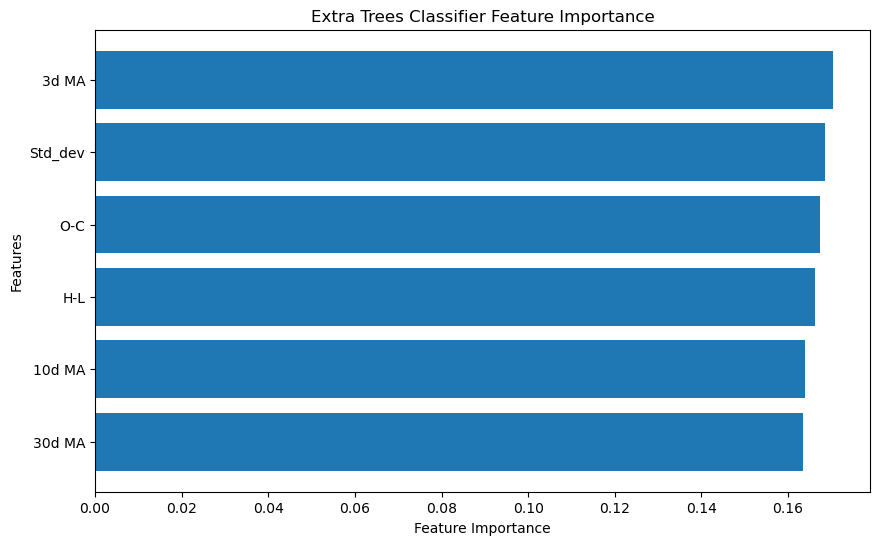

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Importance of classifiers
feature_names = X.columns
importance = model_et.feature_importances_
indices = np.argsort(importance)
range1 = range(len(importance))

plt.figure(figsize=(10, 6))
plt.title("Extra Trees Classifier Feature Importance")
plt.barh(range1, importance[indices])
plt.yticks(range1, feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [53]:
# Create new column for predicted values
df_cleaned['Y_pred'] = np.nan
df_cleaned.iloc[(len(df_cleaned) - len(Y_pred)):, -1] = Y_pred

# Drop rows with NaN values in the 'Y_pred' column
trade_df = df_cleaned.dropna()

# Calculate Market Returns based on 'Close' column
trade_df['Market Returns'] = trade_df['Close'].pct_change()

# Calculate Strategy Returns based on 'Y_pred' column
trade_df['Strategy Returns'] = trade_df['Y_pred'].shift(1) * trade_df['Market Returns']

# Drop NaN values in 'Strategy Returns' column
trade_df = trade_df.dropna()

# Display the DataFrame
trade_df


C:\Users\w2019695\AppData\Local\Temp\ipykernel_8908\379874092.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df['Market Returns'] = trade_df['Close'].pct_change()
C:\Users\w2019695\AppData\Local\Temp\ipykernel_8908\379874092.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df['Strategy Returns'] = trade_df['Y_pred'].shift(1) * trade_df['Market Returns']


,Date,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3d MA,...,30d MA,Std_dev,Price_Rise,Year,3d_MA,10d_MA,30d_MA,Y_pred,Market Returns,Strategy Returns
1968,2021-12-24,3676.000000,3703.899902,3645.300049,3670.250000,3543.776855,141802.0,58.599853,-5.750000,3654.350016,...,3562.326660,45.779676,1,2021,3654.350016,3609.965039,3562.326660,1.0,0.002034,0.002034
1969,2021-12-27,3670.000000,3700.000000,3653.149902,3695.550049,3568.204834,37807.0,46.850098,25.550049,3676.200033,...,3568.028328,34.340124,1,2021,3676.200033,3618.510034,3568.028328,1.0,0.006893,0.006893
1970,2021-12-28,3715.000000,3724.500000,3694.050049,3707.300049,3579.550049,34438.0,30.449951,-7.699951,3691.033366,...,3573.141667,30.188729,0,2021,3691.033366,3626.960034,3573.141667,1.0,0.003179,0.003179
1971,2021-12-29,3700.000000,3719.449951,3684.399902,3693.149902,3565.887207,75965.0,35.050049,-6.850098,3698.666667,...,3577.741667,18.588547,1,2021,3698.666667,3639.315015,3577.741667,1.0,-0.003817,-0.003817
1972,2021-12-30,3693.000000,3739.600098,3680.550049,3733.149902,3604.509033,45572.0,59.050049,40.149902,3711.199951,...,3584.714998,22.934271,1,2021,3711.199951,3654.494995,3584.714998,1.0,0.010831,0.010831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2023-12-22,3796.300049,3845.949951,3762.699951,3825.300049,3825.300049,127163.0,83.250000,29.000000,3798.366699,...,3577.036678,30.812797,0,2023,3798.366699,3749.985034,3577.036678,1.0,0.009461,0.009461
2463,2023-12-26,3780.100098,3833.850098,3780.100098,3794.600098,3794.600098,70216.0,53.750000,14.500000,3803.116699,...,3591.915015,18.113791,1,2023,3803.116699,3765.225049,3591.915015,1.0,-0.008026,-0.008026
2464,2023-12-27,3795.550049,3818.000000,3768.100098,3810.800049,3810.800049,28290.0,49.899902,15.250000,3810.233399,...,3607.848348,17.911341,0,2023,3810.233399,3779.100049,3607.848348,1.0,0.004269,0.004269
2465,2023-12-28,3822.100098,3838.250000,3793.750000,3801.050049,3801.050049,29256.0,44.500000,-21.050049,3802.150065,...,3623.493351,14.216267,0,2023,3802.150065,3799.830054,3623.493351,1.0,-0.002559,-0.002559


In [55]:
# Create a new column for market returns
df_cleaned['Market Returns'] = 0.0

# Calculate market returns
df_cleaned['Market Returns'] = np.log(df_cleaned['Close'] / df_cleaned['Close'].shift(1))

# Shift market returns by one day to represent tomorrow's returns
df_cleaned['Market Returns'] = df_cleaned['Market Returns'].shift(-1)

# Drop any rows with NaN values
df_cleaned.dropna(inplace=True)

# Display the DataFrame
df_cleaned


,Date,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3d MA,10d MA,30d MA,Std_dev,Price_Rise,Year,3d_MA,10d_MA,30d_MA,Y_pred,Market Returns
1967,2021-12-23,3640.500000,3671.000000,3630.050049,3662.800049,3536.583496,62978.0,40.949951,22.300049,3633.750000,3606.595044,3556.254997,40.325331,1,2021,3633.750000,3606.595044,3556.254997,1.0,0.002032
1968,2021-12-24,3676.000000,3703.899902,3645.300049,3670.250000,3543.776855,141802.0,58.599853,-5.750000,3654.350016,3609.965039,3562.326660,45.779676,1,2021,3654.350016,3609.965039,3562.326660,1.0,0.006870
1969,2021-12-27,3670.000000,3700.000000,3653.149902,3695.550049,3568.204834,37807.0,46.850098,25.550049,3676.200033,3618.510034,3568.028328,34.340124,1,2021,3676.200033,3618.510034,3568.028328,1.0,0.003174
1970,2021-12-28,3715.000000,3724.500000,3694.050049,3707.300049,3579.550049,34438.0,30.449951,-7.699951,3691.033366,3626.960034,3573.141667,30.188729,0,2021,3691.033366,3626.960034,3573.141667,1.0,-0.003824
1971,2021-12-29,3700.000000,3719.449951,3684.399902,3693.149902,3565.887207,75965.0,35.050049,-6.850098,3698.666667,3639.315015,3577.741667,18.588547,1,2021,3698.666667,3639.315015,3577.741667,1.0,0.010773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2023-12-21,3734.399902,3805.000000,3734.399902,3789.449951,3789.449951,90556.0,70.600098,55.050049,3793.966716,3730.095020,3562.218343,37.469436,1,2023,3793.966716,3730.095020,3562.218343,1.0,0.009416
2462,2023-12-22,3796.300049,3845.949951,3762.699951,3825.300049,3825.300049,127163.0,83.250000,29.000000,3798.366699,3749.985034,3577.036678,30.812797,0,2023,3798.366699,3749.985034,3577.036678,1.0,-0.008058
2463,2023-12-26,3780.100098,3833.850098,3780.100098,3794.600098,3794.600098,70216.0,53.750000,14.500000,3803.116699,3765.225049,3591.915015,18.113791,1,2023,3803.116699,3765.225049,3591.915015,1.0,0.004260
2464,2023-12-27,3795.550049,3818.000000,3768.100098,3810.800049,3810.800049,28290.0,49.899902,15.250000,3810.233399,3779.100049,3607.848348,17.911341,0,2023,3810.233399,3779.100049,3607.848348,1.0,-0.002562


In [56]:
# Create a new column for strategy returns
df_cleaned['Strategy Returns'] = 0.0

# Compute strategy returns based on Y_pred
df_cleaned['Strategy Returns'] = np.where(df_cleaned['Y_pred'] == True, 
                                          df_cleaned['Market Returns'], 
                                          -df_cleaned['Market Returns'])

# Display the DataFrame
df_cleaned


,Date,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3d MA,...,30d MA,Std_dev,Price_Rise,Year,3d_MA,10d_MA,30d_MA,Y_pred,Market Returns,Strategy Returns
1967,2021-12-23,3640.500000,3671.000000,3630.050049,3662.800049,3536.583496,62978.0,40.949951,22.300049,3633.750000,...,3556.254997,40.325331,1,2021,3633.750000,3606.595044,3556.254997,1.0,0.002032,0.002032
1968,2021-12-24,3676.000000,3703.899902,3645.300049,3670.250000,3543.776855,141802.0,58.599853,-5.750000,3654.350016,...,3562.326660,45.779676,1,2021,3654.350016,3609.965039,3562.326660,1.0,0.006870,0.006870
1969,2021-12-27,3670.000000,3700.000000,3653.149902,3695.550049,3568.204834,37807.0,46.850098,25.550049,3676.200033,...,3568.028328,34.340124,1,2021,3676.200033,3618.510034,3568.028328,1.0,0.003174,0.003174
1970,2021-12-28,3715.000000,3724.500000,3694.050049,3707.300049,3579.550049,34438.0,30.449951,-7.699951,3691.033366,...,3573.141667,30.188729,0,2021,3691.033366,3626.960034,3573.141667,1.0,-0.003824,-0.003824
1971,2021-12-29,3700.000000,3719.449951,3684.399902,3693.149902,3565.887207,75965.0,35.050049,-6.850098,3698.666667,...,3577.741667,18.588547,1,2021,3698.666667,3639.315015,3577.741667,1.0,0.010773,0.010773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2023-12-21,3734.399902,3805.000000,3734.399902,3789.449951,3789.449951,90556.0,70.600098,55.050049,3793.966716,...,3562.218343,37.469436,1,2023,3793.966716,3730.095020,3562.218343,1.0,0.009416,0.009416
2462,2023-12-22,3796.300049,3845.949951,3762.699951,3825.300049,3825.300049,127163.0,83.250000,29.000000,3798.366699,...,3577.036678,30.812797,0,2023,3798.366699,3749.985034,3577.036678,1.0,-0.008058,-0.008058
2463,2023-12-26,3780.100098,3833.850098,3780.100098,3794.600098,3794.600098,70216.0,53.750000,14.500000,3803.116699,...,3591.915015,18.113791,1,2023,3803.116699,3765.225049,3591.915015,1.0,0.004260,0.004260
2464,2023-12-27,3795.550049,3818.000000,3768.100098,3810.800049,3810.800049,28290.0,49.899902,15.250000,3810.233399,...,3607.848348,17.911341,0,2023,3810.233399,3779.100049,3607.848348,1.0,-0.002562,-0.002562


In [57]:
# Compute cumulative market returns
df_cleaned['Cumulative Market Returns'] = np.cumsum(df_cleaned['Market Returns'])

# Compute cumulative strategy returns
df_cleaned['Cumulative Strategy Returns'] = np.cumsum(df_cleaned['Strategy Returns'])

# Display the DataFrame
df_cleaned


,Date,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3d MA,...,Price_Rise,Year,3d_MA,10d_MA,30d_MA,Y_pred,Market Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
1967,2021-12-23,3640.500000,3671.000000,3630.050049,3662.800049,3536.583496,62978.0,40.949951,22.300049,3633.750000,...,1,2021,3633.750000,3606.595044,3556.254997,1.0,0.002032,0.002032,0.002032,0.002032
1968,2021-12-24,3676.000000,3703.899902,3645.300049,3670.250000,3543.776855,141802.0,58.599853,-5.750000,3654.350016,...,1,2021,3654.350016,3609.965039,3562.326660,1.0,0.006870,0.006870,0.008902,0.008902
1969,2021-12-27,3670.000000,3700.000000,3653.149902,3695.550049,3568.204834,37807.0,46.850098,25.550049,3676.200033,...,1,2021,3676.200033,3618.510034,3568.028328,1.0,0.003174,0.003174,0.012076,0.012076
1970,2021-12-28,3715.000000,3724.500000,3694.050049,3707.300049,3579.550049,34438.0,30.449951,-7.699951,3691.033366,...,0,2021,3691.033366,3626.960034,3573.141667,1.0,-0.003824,-0.003824,0.008252,0.008252
1971,2021-12-29,3700.000000,3719.449951,3684.399902,3693.149902,3565.887207,75965.0,35.050049,-6.850098,3698.666667,...,1,2021,3698.666667,3639.315015,3577.741667,1.0,0.010773,0.010773,0.019024,0.019024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2023-12-21,3734.399902,3805.000000,3734.399902,3789.449951,3789.449951,90556.0,70.600098,55.050049,3793.966716,...,1,2023,3793.966716,3730.095020,3562.218343,1.0,0.009416,0.009416,0.043409,-0.005658
2462,2023-12-22,3796.300049,3845.949951,3762.699951,3825.300049,3825.300049,127163.0,83.250000,29.000000,3798.366699,...,0,2023,3798.366699,3749.985034,3577.036678,1.0,-0.008058,-0.008058,0.035351,-0.013716
2463,2023-12-26,3780.100098,3833.850098,3780.100098,3794.600098,3794.600098,70216.0,53.750000,14.500000,3803.116699,...,1,2023,3803.116699,3765.225049,3591.915015,1.0,0.004260,0.004260,0.039611,-0.009455
2464,2023-12-27,3795.550049,3818.000000,3768.100098,3810.800049,3810.800049,28290.0,49.899902,15.250000,3810.233399,...,0,2023,3810.233399,3779.100049,3607.848348,1.0,-0.002562,-0.002562,0.037049,-0.012017


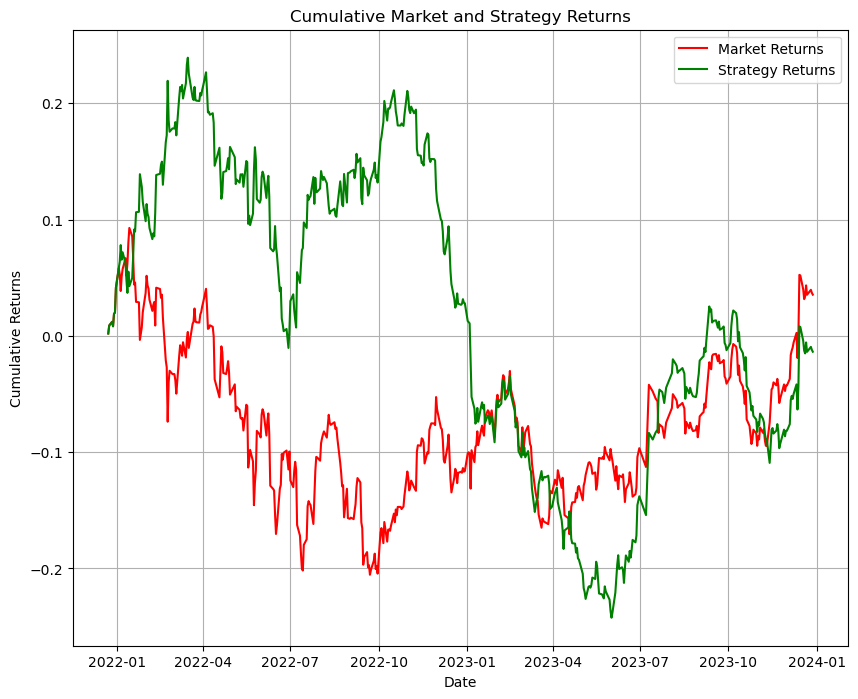

In [73]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Plot the cumulative market and strategy returns
plt.figure(figsize=(10, 8))

plt.plot(df_cleaned['Date'], df_cleaned['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(df_cleaned['Date'], df_cleaned['Cumulative Strategy Returns'], color='g', label='Strategy Returns')

plt.title('Cumulative Market and Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)

plt.show()
